<a href="https://colab.research.google.com/github/nshzk8975/fastai/blob/master/Lesson4_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *

In [95]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/data_save.pkl'),
 PosixPath('/root/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/root/.fastai/data/imdb_sample/data_lm')]

In [96]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [97]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [99]:
data_lm.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [0]:
data_lm.save("data_lm")

In [101]:
data = load_data(path, 'data_lm')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [102]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [103]:
data.train_ds[0][0]

Text xxbos xxmaj although recognized as the best film treatment of the difficulties of having a house in the country built ( or bought ) to your xxunk , it is not the first , nor the last . xxmaj in 1940 xxmaj jack xxmaj benny and xxmaj ann xxmaj xxunk were the leads in the film version of the comedy xxup george xxup washington xxup slept xxup here by xxmaj george xxup s. xxmaj kaufman and xxmaj moss xxmaj hart . xxmaj and about fifteen years ago xxmaj shelly xxmaj long and xxmaj tom xxmaj hanks had the lead in xxup the xxup money xxup pit . xxmaj the former was about moving into an xxunk xxmaj century country house that ... err , needs work . xxmaj the latter was about building your dream house - in the late 1980s . xxmaj although the two films have their moments , both are not as good as xxup blandings , which was based on an autobiographical novel of the same name . 
 
  xxmaj jim xxmaj blandings and his wife xxmaj muriel ( xxmaj cary xxmaj grant and xxmaj myrna xxmaj loy ) are noti

In [104]:
data.train_ds[0][0].data

array([   2,    5,  281, 4702, ...,   40, 2013,  862,   11])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [106]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/models'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm2'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/README')]

In [107]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch())

In [0]:
data_lm.save('tmp_lm2')

In [0]:
data_lm = load_data(path, 'tmp_lm2')

In [111]:
data_lm.show_batch()

idx,text
0,"i disliked , however , was all of the plot complications . xxmaj those could have been okay , if the scriptwriters had taken the time to explain all of them through . xxmaj but what was the purpose of the secret society in the mental institution , specifically ? xxmaj why were they protected from xxmaj michael 's damage until a certain point ? xxmaj what exactly were they"
1,"that * - given all the shots of xxmaj tiger beer interspersed throughout this most forgettable washout of a movie ? \n \n xxmaj meanwhile , dialogue spurts between individuals with occasional stabs at depth , but all too usually nothing of any particular advancement to the movie 's overall story is said or witnessed . xxmaj it 's as if one could switch off at any moment and"
2,"there are over - the - shoulder shots unquestionably belonging to someone else . xxmaj there 's also a really bad photo of him in a cameo locket ( it looks like a bad photocopy ) , and a decent picture of him in a family bible . xxmaj he conjured up xxmaj jack - o originally , or something like that . \n \n xxmaj cameron xxmaj mitchell"
3,"xxbos i had never heard of xxmaj dead xxmaj man 's xxmaj bounty when i saw it at the xxup dvd store a few weeks ago , and i thought i had stumbled upon an unrecognized gem , since it had xxmaj val xxmaj kilmer in it in a truly unique role . xxmaj sadly , it was n't more than ten or fifteen minutes into the movie that i"
4,"chips for breakfast . \n \n xxmaj the problem with this movie , is that it tries to be a movie like "" xxmaj evil xxmaj dead xxunk not under any circumstances associate these 2 movies ) in that it 's so bad it 's funny . xxmaj but it also tries to be funny at the same time , and fails so overwhelmingly to do so , that"


In [0]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

In [113]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


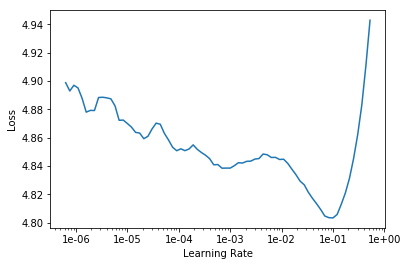

In [114]:
learn.recorder.plot(skip_end=15)

In [115]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.158764,4.010780,0.293523,20:01


In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.927028,3.896476,0.305291,22:43
1,3.847344,3.822090,0.313999,22:45
2,3.799788,3.774436,0.319785,22:47
3,3.703905,3.737589,0.324518,22:48
4,3.641535,3.713309,0.327128,22:45
5,3.559839,3.698512,0.329036,22:47
6,3.519900,3.687977,0.330626,22:46
7,3.424154,3.684029,0.331358,22:47
8,3.380814,3.684306,0.331641,22:46
